In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from bank_telemarketing.preprocessing.preprocess import CustomScaler
from bank_telemarketing.preprocessing.preprocess import MultiLabelEncoder
from bank_telemarketing.preprocessing.preprocess import TargetEncoder
from sklearn.model_selection import train_test_split
from bank_telemarketing.preprocessing.preprocess import CustomOneHotEncoder

In [3]:
data = pd.read_csv("../data/clean/clean_bank_full.csv")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,has_been_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
3,40,admin,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1


In [4]:
x_emb_cols = ["job","marital", "education", "default", "housing", "loan", "month", "day_of_week", "poutcome"]
x_bin_col = ["contact"]
y_col = "subscribed"
x_numerical = ["age","campaign", "pdays", "previous", "emp.var.rate","cons.price.idx", "cons.conf.idx", "euribor3m","nr.employed"]
cats = x_bin_col + x_emb_cols

In [5]:
data[cats] = data[cats].astype("category")

In [6]:
x_pipe = Pipeline(
    steps=
    [
        ("label_encoder", MultiLabelEncoder(cols=cats)),
        ("scaler", CustomScaler(cols=x_numerical)),
        ("onehot", CustomOneHotEncoder(drop="first", categories=cats))
    ]
)
y_mapping = {"no": 0, "yes": 1}
target_encoder = TargetEncoder(auto=False, mapping=y_mapping)

In [7]:
y = data.subscribed
X = data.drop(["subscribed", "duration"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=56)

In [8]:
y_train = y_train.replace(y_mapping).reset_index(drop=True)
X_train = x_pipe.fit_transform(X_train.reset_index(drop=True))

In [9]:
X_train.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,has_been_contacted,...,month_6,month_7,month_8,month_9,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,poutcome_1,poutcome_2
0,-0.776363,0.150962,0.195421,-0.350283,0.839927,0.593336,-0.475919,0.773819,0.847948,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.758673,0.511827,0.195421,-0.350283,0.649049,0.724527,0.880918,0.713896,0.333840,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.183035,-0.209903,0.195421,-0.350283,0.649049,0.724527,0.880918,0.713320,0.333840,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-0.296664,-0.570767,0.195421,-0.350283,-1.196107,-0.861846,-1.423550,-1.298705,-0.939651,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.104784,-0.209903,0.195421,1.693057,-1.196107,-1.176013,-1.229716,-1.364966,-0.939651,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
X_test = x_pipe.transform(X_test.reset_index(drop=True))
y_test = y_test.replace(y_mapping).reset_index(drop=True)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, roc_auc_score, precision_score, confusion_matrix

In [ ]:

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

acc = accuracy_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)

print(f"Accuracy: {acc}")
print(f"F1 Score: {f1}")

In [18]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

acc = accuracy_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy: {acc}")
print(f"F1 Score: {f1}")

Accuracy: 0.8929473479696911
F1 Score: 0.3877777777777778


In [21]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

<AxesSubplot:>

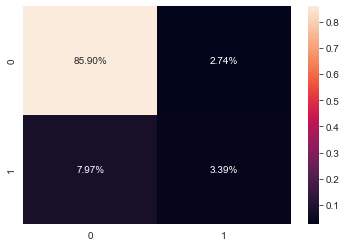

In [24]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%")